# Homework 02

Group 26, 2021/22

## 1)

 ### a) purpose of activation function
 Wether a neuron is activated or not, depends on the result of the weighted sum (the vector product matrix of the matrix of weights and vector of inputs). To make sure this result lies between zero and one, it gets plugged into an "activation function". 
 

 
 

 ### b) What’s the advantage of e.g. sigmoid over the step function (threshold function)?
 An non-linear activation function can store information about the input in each given layer due do the fact that its 
 derivative is dependent on the input. This allows backpropagation.



 ### c) How does sigmoid look like (the formula as well as the graph)?

 formula: $\sigma(t)=\frac{1}{1+e^{-t}}$ 


 ### d) What is the derivative of sigmoid?

 $\sigma'_i(k) = \sigma_i(k)\ (1 - \sigma_i(k))$

 Note: is in itself not found in the code bc it gets plugged into the formula of the error signals

 
 



In [1]:
# Implement a function sigmoid(x) and a function sigmoidprime(x) (the derivative)

def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

def sigmoidprime(x):
    return sigmoid(x)*(1-sigmoid(x))

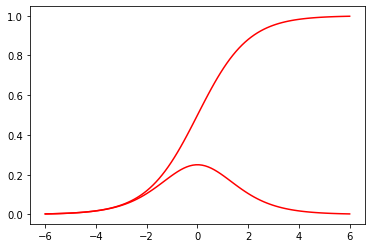

In [2]:
# plotting
import numpy as np
import matplotlib.pyplot as plt

# 100 linearly spaced numbers
x = np.linspace(-6,6,100)
y = np.apply_along_axis(sigmoid,0,x)

# plot the function
plt.plot(x,y, 'r')

y = np.apply_along_axis(sigmoidprime, 0, x)
plt.plot(x,y, 'r')

## 2)

In [3]:
###################################################
## data                                          ##
###################################################

def truthtable(n_col):
    """generates data (truthvalue pairs) to train perceptron on"""
    if n_col < 1:
        return [[]]
    subtable = truthtable(n_col-1)
    return [row + [v] for row in subtable for v in [0, 1]]


inputs = np.asarray(truthtable(2))

print(inputs)


###################################################
## labels                                        ##
###################################################

log_operators = {
    'and': lambda x: x[0] and x[1],
    'or': lambda x: x[0] or x[1],
    'nand': lambda x: not (x[0] and x[1]),
    'nor': lambda  x: not (x[0] or x[1]),
    'xor': lambda  x: (x[0] and not x[1]) or (not x[0] and x[1])
}

labels = {}
for key in log_operators:
    labels[key] = []
    for x in inputs: 
        labels[key].append(int(log_operators[key](x)))
    
print(labels)



[[0 0]
 [0 1]
 [1 0]
 [1 1]]
{'and': [0, 0, 0, 1], 'or': [0, 1, 1, 1], 'nand': [1, 1, 1, 0], 'nor': [1, 0, 0, 0], 'xor': [0, 1, 1, 0]}


## 3) Perceptron


NOTES:

perceptron consists of weights and a bias

should receive an integer argument called input_units
specifying how many weights are coming in to your Perceptron

In the beginning, random values should be assigned to the weights and the bias. use np.random.randn()

Also assign the learning
rate alpha = 1

All of this happens in the init function. Make sure you define weights, bias, alpha with self.

In [4]:
import numpy as np
import numpy.random as rnd

###################################################
## Perceptron                                    ##
###################################################

class Perceptron():
    
    def __init__(self, input_units, learning_rate=1):
        
        self._weights = rnd.normal(size=input_units)
        self._bias = 1
        self._alpha = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward_step(self,inputs):

     #   print("self._weights")
      #  print(self._weights)

#   print("np.asarray(inputs)")
    #    print(np.asarray(inputs))

      #  self.inputs = np.append(inputs, 1) # adding bias=1 to inputs
        self.inputs = inputs
        mat_vec_prod = np.dot(self._weights, np.asarray(inputs))
        return sigmoid(mat_vec_prod + self._bias)


    def update(self, delta): # need input data -> how else supposed to know prediction??
        """
        delta: (a^(L)-y)
        NOTE! delta is the error term NOT the gradient 

        
        """

        # adapt
      #  self._weights -=  delta *self._alpha 
       # self._bias -=  delta  *self._alpha 
        

     #   print("weights")
     #   print(self._weights)

      #  print("delta")

      #  print(delta)

      #  print("alpha")
      #  print(self._alpha)

        """
        self._weights -=  delta *self._alpha 
        self._bias -=  delta  *self._alpha 
        """




## TESTING
    
p = Perceptron(2)
assert p._weights.size == 2, "Should have a weight per input and a bias."
assert isinstance(p.forward_step([2, 1]), float), "Should activate as scalar."
assert -1 <= p.forward_step([100, 100]) <= 1, "Should activate using sigmoid."
p._weights = np.array([.5, .5])


In [5]:
class PerceptronLayer:
    """Layer of multiple neurons.
    
    Attributes:
        perceptrons (list): List of perceptron instances in the layer.
    """
    def __init__(self, n_perceptrons, n_inputs):
        """Initialize the layer as a list of individual neurons.

        """
        # Set self.perceptrons to a list of Perceptrons
        ### BEGIN SOLUTION
        self.perceptrons = [Perceptron(n_inputs)
                            for _ in range(n_perceptrons)]
        self.inputs = [] # vector of input values of given layer
        self.output = [] # vector of activations values
        self.weightMAT = np.asarray([p._weights for p in self.perceptrons])

        ### END SOLUTION

    

    def activate(self, x):
        """Activate this layer by activating each individual neuron.

        Args:
            x (ndarray): Vector of input values.

        Retuns:
            ndarray: Vector of output values which can be 
            used as input to another PerceptronLayer instance.
        """
        # return the vector of activation values
        ### BEGIN SOLUTION

        self.inputs = x
        self.outputs = np.array([p.forward_step(x) for p in self.perceptrons])

        return self.outputs
        ### END SOLUTION

    def adapt(self,  delta):
        """Adapt this layer by adapting each individual neuron.

        Args:
            x (ndarray): Vector of input values.
            deltas (ndarray): Vector of delta values.
            rate (float): Learning rate.
        """
        # Update all the perceptrons in this layer
        ### BEGIN SOLUTION

        print("del")
        print(delta)

        print("self.inputs")
        print(self.inputs)

        gradients = self.inputs * delta

        print(self.weight_matrix)
        print(gradients)

        self.weightMAT *= gradients
       # self.weightMAT = np.dot(self.weight_matrix,gradients)




      #  self.weight_matrix *= gradients

        


        # PER WEIGHT (input) we have ONE delta 
        #for perceptron, delta in zip(self.perceptrons, gradients):
           # print(perceptron)
         #   print(delta)
           
         #   perceptron.update( delta)
         #   print(p)
        ### END SOLUTION

      
    @property
    def weight_matrix(self):
        """Helper property for getting this layer's weight matrix.

        Returns:
            ndarray: All the weights for this perceptron layer.
        """
        


        return np.asarray([p._weights for p in self.perceptrons])

        
    def get_delta(self,error_term):
        """derivative of sigmoid 
        # sigmoidprime is sigmoid(x)*(1-sigmoid(x)) so to be mathematically correct"""
        
        delta =  sigmoid(self.inputs) * (1-sigmoid(self.inputs))

     #   print(deltas)
    #    print(error_term)

        delta *=   2
        delta *=  error_term 
        return delta

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    





l = PerceptronLayer(3, 2)

In [6]:
def accuracy_measure(threshold,x, target):
    return (target-x) < threshold

In [7]:


class MultilayerPerceptron:
    """Network of perceptrons, also a set of multiple perceptron layers.
    
    Attributes:
        layers (list): List of perceptron layers in the network.
    """
    def __init__(self, n_hidden, n_perceptrons, n_inputs, n_output):
        """Initialize a new network, madeup of individual PerceptronLayers.

        Args:
            n_hidden, how many hidden layers
            n_perceptrons, how many perceptrons per hidden layer
            n_inputs, how many weights for FIRST HIDDEN LAYER !!TODO MAKE SCALABLE 
            n_output, how many output perceptrons 
        """
        self.hidden_layers = [PerceptronLayer(n_perceptrons, n_inputs) 
                            for _ in range(n_hidden)]
                             # NOT SCALABLE TO MULTIPLE LAYERS YET BC N_INPUT 

        self.output_layer = PerceptronLayer(n_output,n_perceptrons)

        self.accuracy = 0
        self.loss = np.inf
                            


    def forward_step(self, x):
        """Activate network and return the last layer's output.

        Args:
            x (ndarray): Vector of input values.

        Returns:
            predicted output 
        """
        # Propagate activation through the network
        for layer in self.hidden_layers:
            x = layer.activate(x)

        x = self.output_layer.activate(x)
        return x        


    def backprop_step(self, x, targets):
        """Adapt the whole network given an input and expected output.

        Args:
            x (ndarray): Vector of input values.
            t (ndarray): Vector of target values (expected outputs).
            rate (float): Learning rate.
        """

        'forward propagation'

        outputs = self.forward_step(x) 

  #      print("oiut", self.output_layer.outputs)
        

        'Error: OutputLayer'

        error_term  = targets - self.output_layer.outputs

        self.accuracy = (targets-self.output_layer.outputs) < 0.5

        self.loss = error_term**2

        delta = self.output_layer.get_delta(error_term)

        # adapt
        self.output_layer.adapt( delta )


        'Error: hidden Layers'

        
        for layer in self.hidden_layers:
            delta = layer.get_delta(error_term)
        ##    print("d")
        #    print(delta)
         ##   print("e")
        #    print(error_term)


            error_term = delta * layer.weight_matrix
            layer.adapt( delta )



    def train(self,inputs,targets,epochs):
        accuracy_per_epoch = []
        loss_per_epoch = []
        

        for epoch in range(epochs):

            accuracy_per_point = []
            loss_per_point = []

            for sample_index in range(len(targets)):

                self.backprop_step(inputs[sample_index], targets[sample_index])
                
                accuracy_per_point.append(MLP.accuracy)
                loss_per_point.append(MLP.loss)
            
            accuracy_per_epoch.append(np.mean(accuracy_per_point[-len(targets):]) )
            loss_per_epoch.append(np.mean(loss_per_point[-len(targets):]))


        return accuracy_per_epoch, loss_per_epoch


            
        

       
       

In [8]:
a = [1,2,3,4]

b = ["a","b"]

for x,y in zip(b,a):
    print(x)
    print(y)
    print("_")

a
1
_
b
2
_


del
[0.02366885 0.02366885 0.02366885 0.02366885]
self.inputs
[0.73105858 0.73105858 0.73105858 0.73105858]
[[-0.13723758  0.69944726  0.85497163  1.132889  ]]
[0.01730332 0.01730332 0.01730332 0.01730332]
del
[0.02697467 0.02697467]
self.inputs
[0 0]
[[ 1.39385448  1.39820355]
 [-1.91588533 -0.33902705]
 [-0.71281114 -1.30147254]
 [ 1.05299078 -0.68459264]]
[0. 0.]
del
[0.03540014 0.03897868 0.04146983 0.03994034]
self.inputs
[0.91669021 0.65947891 0.42519755 0.57820458]
[[-0.13723758  0.69944726  0.85497163  1.132889  ]]
[0.03245096 0.02570562 0.01763287 0.02309369]
del
[0.0433726  0.03411028]
self.inputs
[0 1]
[[ 1.39385448  1.39820355]
 [-1.91588533 -0.33902705]
 [-0.71281114 -1.30147254]
 [ 1.05299078 -0.68459264]]
[0.         0.03411028]
del
[0.02910861 0.03494071 0.03290062 0.02948119]
self.inputs
[0.91635748 0.28579703 0.57130778 0.88624947]
[[-0.13723758  0.69944726  0.85497163  1.132889  ]]
[0.02667389 0.00998595 0.01879638 0.02612769]
del
[0.028044   0.03565907]
self.inputs


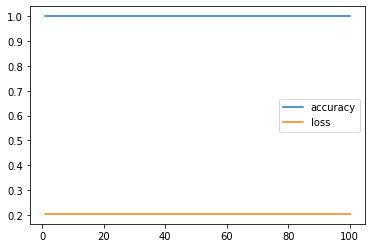

In [9]:
#aw4es5rizuloö
#  def __init__(self, n_hidden, n_perceptrons, n_inputs, n_output):
MLP = MultilayerPerceptron(1,4,2,1)


def truthtable(n_col):
    """generates data (truthvalue pairs) to train perceptron on"""
    if n_col < 1:
        return [[]]
    subtable = truthtable(n_col-1)
    return [row + [v] for row in subtable for v in [0, 1]]


inputs = np.asarray(truthtable(2))


# what to train???

targets = labels["nand"]

n_epochs = 100
acc, loss = MLP.train(inputs,targets,n_epochs)

## visu

x = np.linspace(1, n_epochs, n_epochs)
y_1 = acc
y_2 = loss


plt.plot(x,y_1)
plt.plot(x, y_2)
plt.legend(['accuracy', 'loss'])
plt.show()

In [10]:
def uniform(a, b, n=1):
    """Returns n floats uniformly distributed between a and b."""
    return (b - a) * np.random.random_sample(n) + a


n = 1000
radius = 5
r = np.append(uniform(0, radius * .5, n // 2),
              uniform(radius * .7, radius, n // 2))
angle = uniform(0, 2 * np.pi, n)
x = r * np.sin(angle) + uniform(-radius, radius, n)
y = r * np.cos(angle) + uniform(-radius, radius, n)
inputs = np.vstack((x, y)).T
targets = np.less(np.linalg.norm(inputs, axis=1), radius * .5)




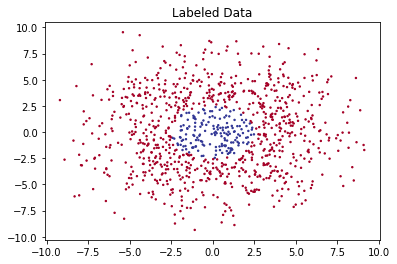

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(num='Data')
ax.set(title='Labeled Data')
ax.scatter(*inputs.T, 2, c=targets, cmap='RdYlBu')
plt.show()

In [12]:

# Adapt this MLP
### BEGIN SOLUTION
MLP = MultilayerPerceptron(1,1,2,1)
### END SOLUTION

In [13]:
%matplotlib notebook
from matplotlib import cm


def train(epochs):

    max_accuracy = 0

    fig, ax = plt.subplots(num='Training')
    scatter = ax.scatter(*inputs.T, 2)
    plt.show()

    for epoch in range(1, epochs + 1):
        
        sample_index = np.random.randint(0, len(targets))



        MLP.backprop_step(inputs[sample_index], targets[sample_index])

        if (epoch % 250) == 0:
            outputs = np.squeeze([MLP.forward_step(x) for x in inputs])
            predictions = np.round(outputs)
            accuracy = np.sum(predictions == targets) / len(targets) * 100
            if accuracy > max_accuracy:
                max_accuracy = accuracy
            scatter.set_color(cm.RdYlBu(outputs))
            ax.set(title=f'Training {epoch / EPOCHS * 100:.0f}%: {accuracy:.2f}%. Best accuracy: {max_accuracy:.2f}%')
            fig.canvas.draw()


#train(epochs=1000)

NameError: name 'outputs' is not defined

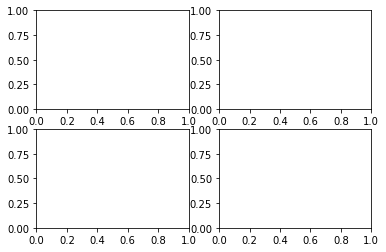

In [14]:
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].scatter(*inputs.T, 2, c=outputs, cmap='RdYlBu')
ax[0, 0].set_title('Continuous Classification')
ax[0, 1].set_title('Discretized Classification')
ax[0, 1].scatter(*inputs.T, 2, c=np.round(outputs), cmap='RdYlBu')
ax[1, 0].set_title('Original Labels')
ax[1, 0].scatter(*inputs.T, 2, c=targets, cmap='RdYlBu')
ax[1, 1].set_title('Wrong Classifications')
ax[1, 1].scatter(*inputs.T, 2, c=(targets != np.round(outputs)), cmap='OrRd')
plt.show()